## Assignment 1 - Classification


## Learning Outcomes


* Data exploration and pre-processing

* Develop a pipeline to carry out classification

* Compare different metrics and classifiers

The objective is to predict whether or not a credit card client will default for their payment in the next month. We will be using the better of 2 classifiers namely, Random Forest and KNN Classifier, and determine the best of a given set of hyperparameters by using grid search.


In [1]:
## Use this for consistency in graphs through out the notebook
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


**Questions (12 marks total)**

Q1.  Explore the credit card data set provided. You can also access it from the this link 

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
(https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

The data is open for public use and no authorizations are required.

You will build a classification model for this default of credit card clients dataset.  The objective is to predict whether or not a credit card client will default for their payment in the next month.

Make sure you perform your analyses and answer the questions in sections below:

1. Data exploration:  ( 3 marks) 

    - Explore the data ( for example look at the data, plot graphs ( histogram, pair plots)
    
2. Data Preprocessing: (4 marks)

    - Make sure you build a full data pipeline ( ie., use the pipeline to apply transformers and estimators- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html )
    - Do you require any data pre-processing? Are all the features useful? (Use only raw features from this dataset, in other words, no need to create feature crosses or new features)
    - Set the random seed to 123 (For splitting or any other random algorithm)
    - Split data into training (80%) and testing (20%)
    - Use Cross-validation with 5-folds
    - For other parameters, use default

3. Classification: (5 marks)

    - Study the ROC Curve, decide threshold
    - Use 2 classifiers.
    
         a. Random Forest
            - tune only: n_estimators: {4, 5, 10, 20, 50}.  We will be running random forest model using GridSearchCV, determine the best hyperparameter for the given list of n_estimators {4, 5, 10, 20, 50}. n_estimators refers to the number of trees in the forest. We will use CV = 5 and the scoring to be the roc_auc (area under the curve)
          
       b. KNN Classfier 
            - tune only: n_neighbors: {3, 5, 10, 20}. You may perform similar GridSearchCV as in the previous exercise with a given list of n_neightbors. 
        
    - Which one performs better in the cross validation? Note down your observations and give comments.
    
You may refer to the documentation for RandomForests and KNN Classifiers, for the different parameters and options available in the scikit-learn library.
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html



In [2]:
### Your code here

## Feel free to use multiple cells  and continue from here:

df = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls", skiprows= 1, header = 0)

#1. data exploration

#we use sample(), info() and describe() to review the data

In [3]:
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
25665,25666,40000,2,2,2,26,-1,0,0,0,...,0,44024,18697,1300,1000,0,22373,680,10000,0
16464,16465,80000,2,3,1,59,0,0,0,0,...,50875,50372,49470,3212,2106,2000,1603,1903,2006,0
22386,22387,170000,2,1,2,30,2,2,2,2,...,157577,168094,170922,6800,6500,0,13000,5500,1000,1
10149,10150,200000,2,2,1,41,-2,-2,-2,-2,...,0,0,0,742,0,0,0,0,0,1
8729,8730,50000,1,2,1,43,0,0,0,0,...,9225,9417,9617,1140,1150,331,341,356,330,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


We can see that there's no null value in all numberic data column. However, Education and Marriage have 0 labels (undocumented). For Pay and Bill Amount, we can see some negative amount, wonder if those are due to chargeback.

In [6]:
# relabel Pay_0 with Pay_1 and relabel defaul payment next month with def_pay
df = df.rename(columns={'default payment next month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


We use some histograms to have a feel of the distribution, checking if they make sense, the presence of outliers etc

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout() 
    plt.show()

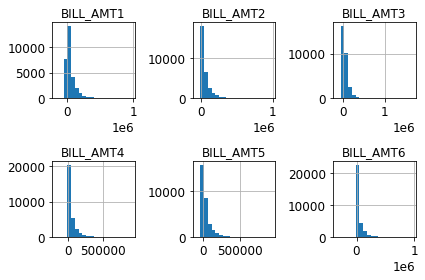

In [9]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

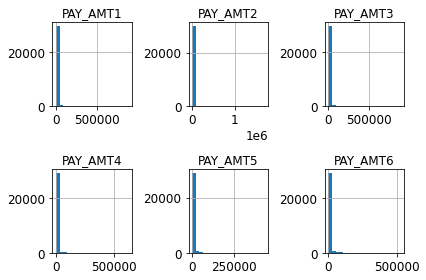

In [10]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

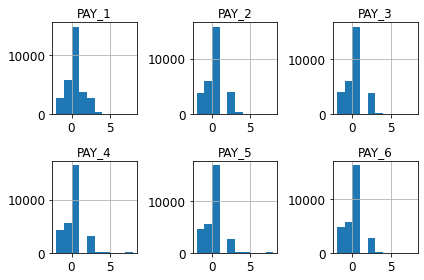

In [11]:
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

<AxesSubplot:>

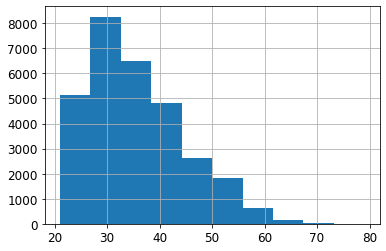

In [12]:
df.AGE.hist()

<AxesSubplot:>

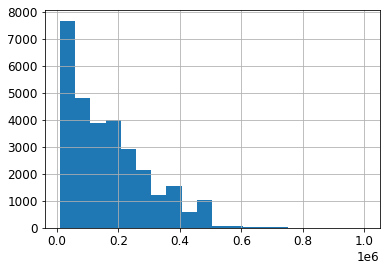

In [13]:
df.LIMIT_BAL.hist(bins = 20)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


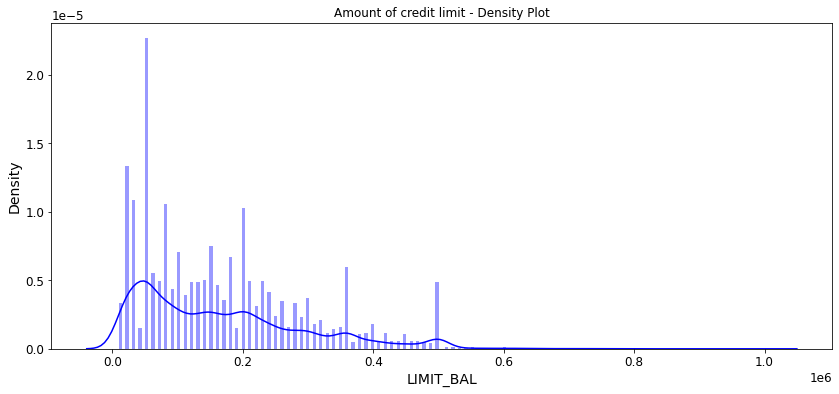

In [14]:
#Amount of credit limit
plt.figure(figsize = (14,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

Largest group of amount of credit limit is apparently for amount of 50K.

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


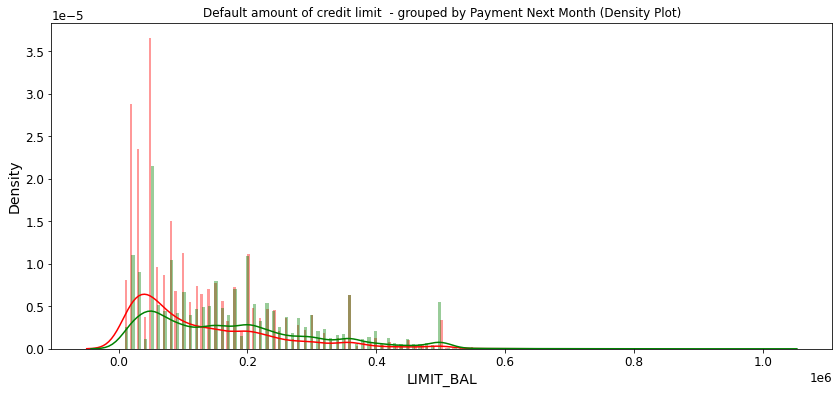

In [15]:
#Amount of credit limit grouped by default payment next month
class_0 = df.loc[df['def_pay'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['def_pay'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

Most of defaults are for credit limits 0-100,000 (and density for this interval is larger for defaults than for non-defaults). Larger defaults number are for the amounts of 50,000, 20,000 and 30,000.

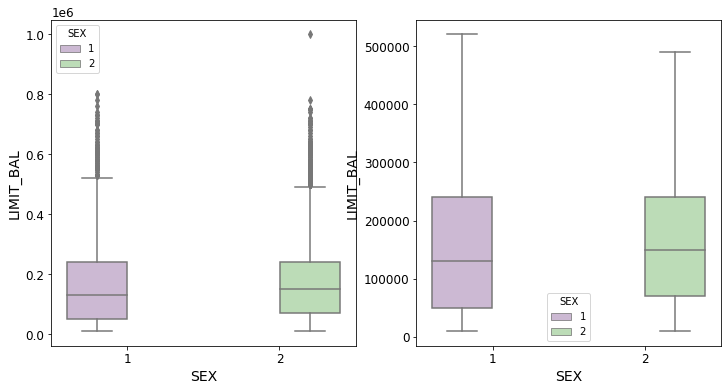

In [16]:
#Credit limit vs. sex
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="SEX", y="LIMIT_BAL", hue="SEX",data=df, palette="PRGn",showfliers=False)
plt.show();

The limit credit amount is quite balanced between sexes. The males have a slightly smaller Q2 and larger Q3 and Q4 and a lower mean. The female have a larger outlier max value (1M NT dollars).

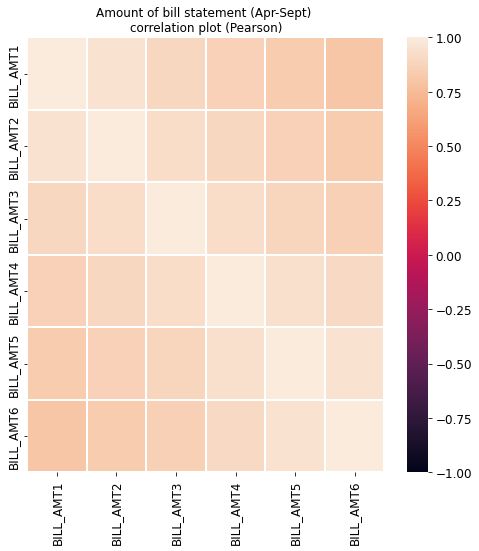

In [17]:
#the correlation of Amount of bill statement in April - September 2005
var = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.figure(figsize = (8,8))
plt.title('Amount of bill statement (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.

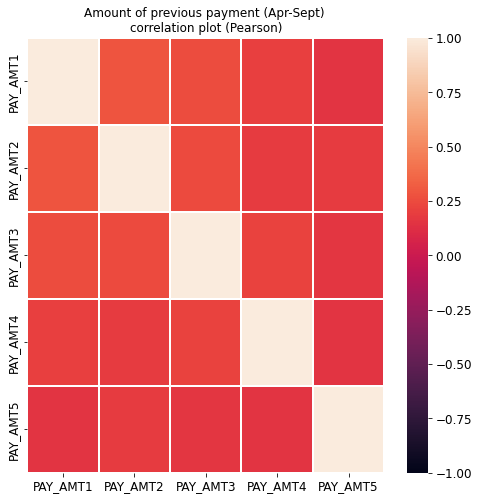

In [18]:
#the correlation of Amount of previous payment in April - September 2005
var = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']

plt.figure(figsize = (8,8))
plt.title('Amount of previous payment (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

There are no correlations between amounts of previous payments for April-Sept 2005.

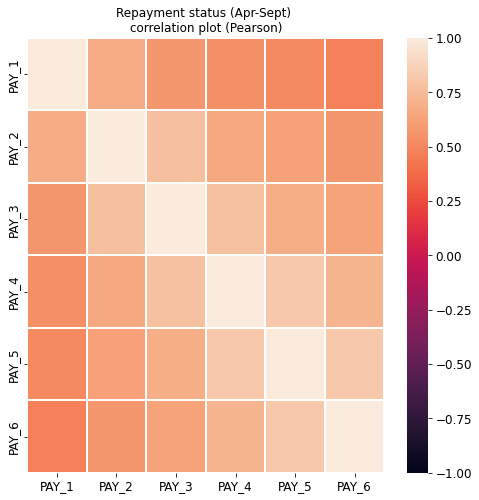

In [19]:
#the correlation between Repayment status in April - September 2005
var = ['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

plt.figure(figsize = (8,8))
plt.title('Repayment status (Apr-Sept) \ncorrelation plot (Pearson)')
corr = df[var].corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
plt.show()

Correlation is decreasing with distance between months. Lowest correlations are between Sept-April.

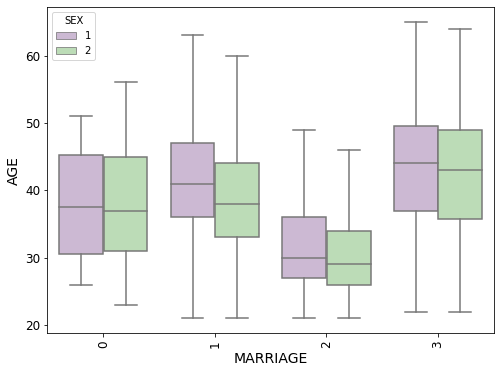

In [20]:
#the boxplots with age distribution grouped by marriage status and sex
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sns.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=df, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();
boxplot_variation('MARRIAGE','AGE', 'SEX',8)

It looks like Married status 3 (others), with mean values over 40 and Q4 values over 60 means mostly vidowed or divorced whilst Married status 0 could be not specified or divorced, as Q1 values are above values for married of both sexes.

Married males have mean age above married women. Unmarried males have mean value for age above unmarried women as well but closer. Q3 abd Q4 values for married man are above corresponding values for married women.

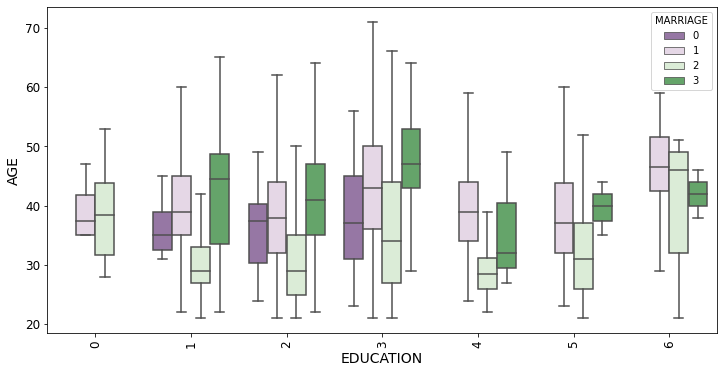

In [21]:
#the boxplots with age distribution grouped by education and marriage
boxplot_variation('EDUCATION','AGE', 'MARRIAGE',12)

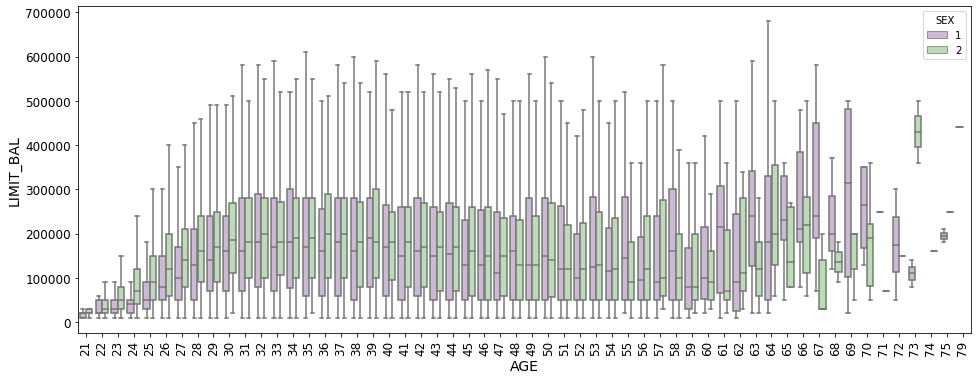

In [22]:
#Age, sex and credit amount limit
boxplot_variation('AGE','LIMIT_BAL', 'SEX',16)

Mean, Q3 and Q4 values are increasing for both male and female with age until aroung 35 years and then they are oscilating and get to a maximum of Q4 for males at age 64.

Mean values are generally smaller for males than for females, with few exceptions, for example at age 39, 48, until approximately 60, where mean values for males are generally larger than for females.

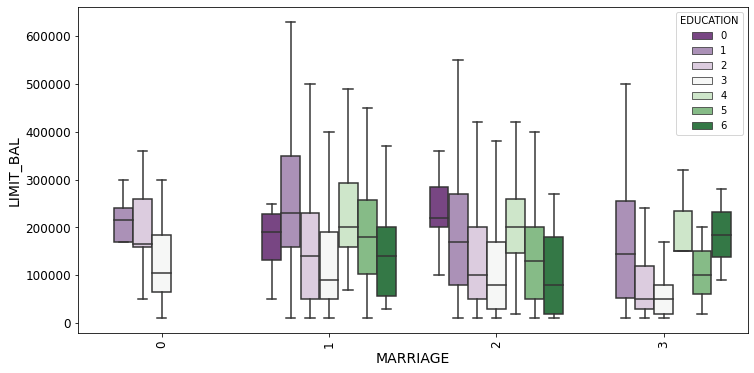

In [23]:
# the boxplots with credit amount limit distribution grouped by marriage status and education level
boxplot_variation('MARRIAGE','LIMIT_BAL', 'EDUCATION',12)

#2. data processing

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import joblib

In [25]:
#Define predictors and target values
target = 'def_pay'
predictors = [  'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 
                'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
                'BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
y = df[target].copy() # target
X = df[predictors].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

In [26]:
X_train_scaled = preprocessing.scale(X_train)
print (X_train_scaled)

[[-0.05686623  0.80844039  0.18452304 ...  0.08696116  0.50039738
   0.04874486]
 [-0.13408117  0.80844039 -1.07753249 ... -0.3180751  -0.31697847
  -0.29299231]
 [-1.21509034 -1.23694958  0.18452304 ... -0.29855368 -0.29671021
  -0.23696983]
 ...
 [-0.36572599  0.80844039 -1.07753249 ... -0.18527633 -0.23723448
  -0.23696983]
 [ 1.48743258 -1.23694958 -1.07753249 ... -0.3180751  -0.31697847
  -0.29299231]
 [ 1.02414294 -1.23694958 -1.07753249 ... -0.3180751  -0.31697847
  -0.29299231]]


In [27]:
print (X_train_scaled.mean(axis=0))

[ 8.43769499e-17  2.50762374e-16 -4.11522668e-17  8.88178420e-19
 -1.66977543e-16  7.84557604e-18 -2.75335310e-17 -1.98359847e-17
  1.16943492e-17 -4.76655752e-17 -2.66453526e-18  4.20404452e-17
 -9.32587341e-18  6.30606678e-17 -5.62512999e-17  5.03301104e-17
  6.30606678e-17 -1.18423789e-17 -1.50990331e-17 -2.96059473e-19
 -1.61352413e-17  7.10542736e-18  1.77635684e-17]


In [28]:
print (X_train_scaled.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [29]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [30]:
X_train_scaled = scaler.transform(X_train)
print (X_train_scaled.mean(axis=0))
print (X_train_scaled.std(axis=0))

[ 8.43769499e-17  2.50762374e-16 -4.11522668e-17  8.88178420e-19
 -1.66977543e-16  7.84557604e-18 -2.75335310e-17 -1.98359847e-17
  1.16943492e-17 -4.76655752e-17 -2.66453526e-18  4.20404452e-17
 -9.32587341e-18  6.30606678e-17 -5.62512999e-17  5.03301104e-17
  6.30606678e-17 -1.18423789e-17 -1.50990331e-17 -2.96059473e-19
 -1.61352413e-17  7.10542736e-18  1.77635684e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [31]:
X_test_scaled = scaler.transform(X_test)
print (X_test_scaled.mean(axis=0))
print (X_test_scaled.std(axis=0))

[ 0.00461962 -0.0103974  -0.00415427 -0.00966037  0.02875184 -0.01146348
  0.00132077  0.00300076  0.00286886  0.01836763  0.00974878  0.00835472
  0.01177377  0.01105769  0.00829783  0.01212243  0.01650554  0.01239295
  0.01016873  0.00282756  0.01186724  0.00978388 -0.00403444]
[1.00910388 1.00217128 0.98716336 1.00062592 1.01194911 1.00284149
 0.99319425 1.01127955 1.03068851 1.03493344 1.01956529 1.00852259
 1.02330026 1.067294   1.02213561 1.01384843 1.02043189 1.12258314
 1.57201934 1.02640736 1.18744716 1.07418001 0.97942976]


In [32]:
pipeline = make_pipeline(preprocessing.StandardScaler(), 
                         RandomForestRegressor(n_estimators=100))

In [33]:
print (pipeline.get_params())

{'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomforestregressor', RandomForestRegressor())], 'verbose': False, 'standardscaler': StandardScaler(), 'randomforestregressor': RandomForestRegressor(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomforestregressor__bootstrap': True, 'randomforestregressor__ccp_alpha': 0.0, 'randomforestregressor__criterion': 'mse', 'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': 'auto', 'randomforestregressor__max_leaf_nodes': None, 'randomforestregressor__max_samples': None, 'randomforestregressor__min_impurity_decrease': 0.0, 'randomforestregressor__min_impurity_split': None, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__min_weight_fraction_leaf': 0.0, 'randomforestregressor__n_estimators': 100, 'randomforestregressor__n_jobs': None, 'randomforestregressor__oob_score': F

#Training and validation using cross-validation

Let's use now cross-validation. We will use cross-validation (KFolds) with 5 folds. Data is divided in 5 folds and, by rotation, we are training using 4 folds (n-1) and validate using the 5th (nth) fold.

3. Classification

a. Random Forest

In [47]:
# Declare hyperparameters to tune.
hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                  'randomforestregressor__max_depth': [None, 5, 3, 1]}

In [48]:
# Tune model using a cross-validation pipeline.
clf = GridSearchCV(pipeline,hyperparameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [None, 5, 3, 1],
                         'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 'log2']})

In [49]:
# Refit on the entire training set.
print (clf.refit)

True


In [50]:
# Evaluate model pipeline on test data.
y_pred = clf.predict(X_test)

In [51]:
print (roc_auc_score(y_test, y_pred))
print (mean_squared_error(y_test, y_pred))

0.6252994203283331
0.16832515761477262


b. KNN

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

In [35]:
x = np.array(df.iloc[:, 0:4])
y = np.array(df[target])

In [36]:
knn = KNeighborsClassifier(n_neighbors=3)

In [37]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
pred = knn.predict(X_test)

In [39]:
pred #look at classifications

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
# evaluate accuracy
print(accuracy_score(y_test, pred))

0.7331666666666666


In [41]:
# Number of correct predictions

comparison = (y_test == pred)
np.count_nonzero(comparison) #although its called non_zero, with boolean values this tests for # of True

4399

In [42]:
comparison

6907      True
24575    False
26766     True
2156     False
3179      True
         ...  
8836      True
1259      True
27309     True
29583     True
24399     True
Name: def_pay, Length: 6000, dtype: bool

In [43]:
# the number of mispredictions

np.size(comparison)-np.count_nonzero(comparison)

1601

In [44]:
# Same result as above - the number of mispredictions

np.count_nonzero(comparison == False)

1601

In [45]:
num_splits = 10 #train test splits
k_vals = [1, 3, 5, 7, 10, 20, 30, 40, 50] #each k value to be tested
accuracies = [] #list to collect the accuracy scores
comparisons = [] #list to collect the number of non_zero (or TRUE) values

for k in k_vals: #for each value of k we are going to first create an accuracy list, and a comp list, then populate these lists
    acc_samples = []
    comp_samples = []
    for i in range(num_splits):
        # make sure we don't set the `random_state` parameter to an integer, we want random splits
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        acc_samples.append(accuracy_score(y_test, y_pred)) #calculate the accuracy score and add to list
        comp_samples.append(np.count_nonzero(y_test == y_pred)) #count non_zeros and add to list
    accuracies.append(np.mean(acc_samples)) #for each k's list, calculate the mean score and add to master list
    comparisons.append(np.mean(comp_samples)) #for each k's list, calculate the mean non_zero values & add to master list

    #create a dataframe
compare_df = pd.DataFrame({'Correct Predictions':comparisons,'Accuracy Score':accuracies}, index=[k_vals])
compare_df

,Correct Predictions,Accuracy Score
1,6000.2,0.666689
3,6442.7,0.715856
5,6648.8,0.738756
7,6758.3,0.750922
10,6936.8,0.770756
20,6965.2,0.773911
30,6987.1,0.776344
40,6994.9,0.777211
50,7010.2,0.778911


Text(0, 0.5, 'Accuracy')

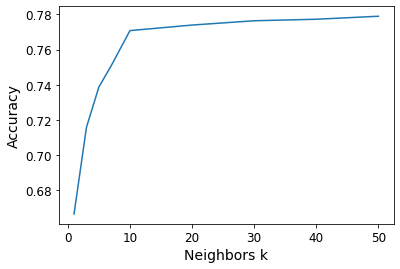

In [46]:
plt.plot(k_vals,compare_df['Accuracy Score'])
plt.xlabel('Neighbors k')
plt.ylabel('Accuracy')

The accuracy is reasonably high for this data set, but generally we can conclude that the higher the value of K, the higher the accuracy

#### Conclusions

I will chose KNN as the score is higher.